# CSV data process

Download the movie tweetings dataset and keep a copy in your computer hard disk. Find the data file path and Pandas can directly read_csv() to get the data into a DataFrame.

In [2]:
import pandas as pd
import numpy as np
import pathlib

In [3]:
path = pathlib.Path('D:/Edu/data_resource/dataset-MovieTweetings')
file_full_name = path/'ratings.dat'
cols = ['user id', 'item id', 'rating', 'timestamp']
dfRatings = pd.read_csv(file_full_name, sep='::', names=cols, index_col=False, encoding='utf-8', engine='python')

dfRatings[:10]

,user id,item id,rating,timestamp
0,1,114508,8,1381006850
1,2,499549,9,1376753198
2,2,1305591,8,1376742507
3,2,1428538,1,1371307089
4,3,75314,1,1595468524
5,3,102926,9,1590148016
6,3,114369,10,1597555347
7,3,118715,8,1596006798
8,3,120737,8,1599306720
9,3,208092,5,1586466072


In [4]:
dfRatings.shape

(915370, 4)

In [4]:
dfRatings.describe()

,user id,item id,rating,timestamp
count,907053.000000,9.070530e+05,907053.000000,9.070530e+05
mean,35605.514884,2.239661e+06,7.315717,1.462524e+09
std,20528.635923,2.123483e+06,1.852999,7.185823e+07
min,1.000000,8.000000e+00,0.000000,1.362062e+09
25%,18137.000000,7.650100e+05,6.000000,1.397076e+09
50%,35405.000000,1.723121e+06,8.000000,1.452010e+09
75%,53047.000000,2.944454e+06,9.000000,1.518285e+09
max,70801.000000,1.477325e+07,10.000000,1.623291e+09


For all the ratings, we count each rating how many counts.

In [5]:
rating_counts = dfRatings['rating'].value_counts()
rating_counts

8     218792
7     203180
9     128448
6     118225
10    107028
5      68387
4      27765
3      15248
1      10658
2       9044
0        278
Name: rating, dtype: int64

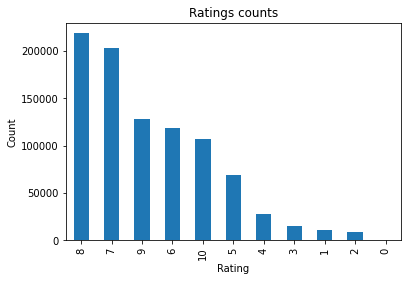

In [6]:
import matplotlib.pyplot as plt
rating_counts.plot(kind='bar')
plt.title('Ratings counts')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

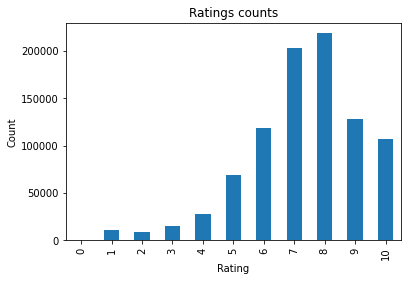

In [7]:
rating_counts.sort_index(inplace=True)
rating_counts.plot(kind='bar')
plt.title('Ratings counts')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

value_counts, is actually same as groupby then agg the total counts.

In [8]:
rating_counts = dfRatings['rating'].groupby(dfRatings['rating']).agg(['size'])
rating_counts

,size
rating,
0,278
1,10658
2,9044
3,15248
4,27765
5,68387
6,118225
7,203180
8,218792


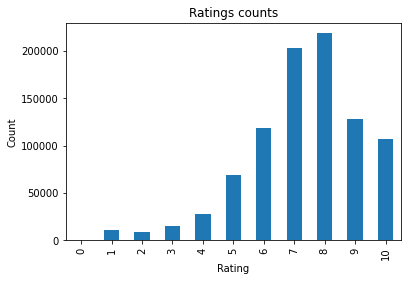

In [9]:
rating_counts.sort_index(inplace=True)
rating_counts.plot(kind='bar',legend=None)
plt.title('Ratings counts')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

Now we read in another data file, the information regarding all movies.

In [10]:
file_full_name = path/'movies.dat'
cols = ['movie id', 'name', 'genre']
dfMovies = pd.read_csv(file_full_name, sep='::', names=cols, index_col=False, encoding='utf-8', engine='python')

dfMovies[:10]

,movie id,name,genre
0,8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
1,10,La sortie des usines Lumière (1895),Documentary|Short
2,12,The Arrival of a Train (1896),Documentary|Short
3,25,The Oxford and Cambridge University Boat Race ...,NaN
4,91,Le manoir du diable (1896),Short|Horror
5,131,Une nuit terrible (1896),Short|Comedy|Horror
6,417,A Trip to the Moon (1902),Short|Action|Adventure|Comedy|Fantasy|Sci-Fi
7,439,The Great Train Robbery (1903),Short|Action|Crime|Western
8,443,"Hiawatha, the Messiah of the Ojibway (1903)",NaN
9,628,The Adventures of Dollie (1908),Action|Short


Try to find all movie genre contains 'Crime|Drama'

In [11]:
criterion = dfMovies['genre'].map(lambda x: x!='NaN' and 'Crime|Drama' in str(x))
crime_movies = dfMovies[criterion]
crime_movies[:10]

,movie id,name,genre
16,2844,Fantômas - À l'ombre de la guillotine (1913),Crime|Drama
34,5960,Regeneration (1915),Biography|Crime|Drama|Romance
36,6206,Les vampires (1915),Action|Adventure|Crime|Drama|Mystery|Thriller
81,12651,Schloß Vogeloed (1921),Crime|Drama|Horror|Mystery
143,17075,The Lodger: A Story of the London Fog (1927),Crime|Drama|Mystery|Thriller
173,18526,Underworld (1927),Crime|Drama|Film-Noir|Romance
178,18737,Die Büchse der Pandora (1929),Crime|Drama|Romance
182,18839,The Docks of New York (1928),Crime|Drama|Film-Noir|Romance
244,20686,The Big House (1930),Crime|Drama|Thriller
252,20859,Escape! (1930),Crime|Drama


In [12]:
crime_movies.shape

(2990, 3)

Try to find all movies with genre 'Crime|Drama'

In [13]:
crime_movies = dfMovies[dfMovies['genre'] == 'Crime|Drama']
crime_movies[:10]

,movie id,name,genre
16,2844,Fantômas - À l'ombre de la guillotine (1913),Crime|Drama
252,20859,Escape! (1930),Crime|Drama
268,21406,Sono yo no tsuma (1930),Crime|Drama
280,21739,La chienne (1931),Crime|Drama
286,21785,Daughter of the Dragon (1931),Crime|Drama
310,22286,The Public Enemy (1931),Crime|Drama
311,22335,Safe in Hell (1931),Crime|Drama
315,22403,Smart Money (1931),Crime|Drama
348,23054,The Impassive Footman (1932),Crime|Drama
394,23817,Blondie Johnson (1933),Crime|Drama


In [14]:
crime_movies.shape

(449, 3)

in the ratings table, 'item id', and in the movies table, 'movie id', they are the same id. using these two id can cross connect the data of the 2 tables.

In [15]:
criterion = dfRatings['item id'].map(lambda x: (crime_movies['movie id'] == x).any())
crime_movie_rating = dfRatings[criterion]
crime_movie_rating[:10]

,user id,item id,rating,timestamp
4,3,75314,1,1595468524
26,4,1800241,7,1388955438
39,7,1800241,7,1390001706
56,9,1895587,8,1456480247
115,31,68646,10,1381651760
157,39,1600196,7,1421846554
163,39,1800241,7,1406265706
213,45,1800241,9,1389082441
293,54,86250,9,1430016465
300,54,144084,5,1454961634


In [16]:
crime_movie_rating.shape

(17888, 4)

the above is a very slow way of getting record from one table based on values from another table.  
following is a much faster way to get the similar result: filter one table based on the value from another table.

In [17]:
crime_movie_rating_2 = dfRatings.merge(crime_movies,how='left',left_on='item id', right_on='movie id',indicator=True).query('_merge=="both"').drop(columns=['_merge','movie id'])
crime_movie_rating_2.shape

(17888, 6)

In [18]:
crime_movie_rating_2[:10]

,user id,item id,rating,timestamp,name,genre
4,3,75314,1,1595468524,Taxi Driver (1976),Crime|Drama
26,4,1800241,7,1388955438,American Hustle (2013),Crime|Drama
39,7,1800241,7,1390001706,American Hustle (2013),Crime|Drama
56,9,1895587,8,1456480247,Spotlight (2015),Crime|Drama
115,31,68646,10,1381651760,The Godfather (1972),Crime|Drama
157,39,1600196,7,1421846554,The Drop (2014),Crime|Drama
163,39,1800241,7,1406265706,American Hustle (2013),Crime|Drama
213,45,1800241,9,1389082441,American Hustle (2013),Crime|Drama
293,54,86250,9,1430016465,Scarface (1983),Crime|Drama
300,54,144084,5,1454961634,American Psycho (2000),Crime|Drama


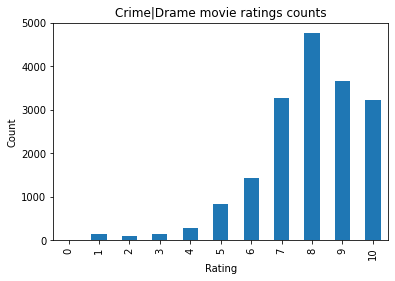

In [19]:
crime_rating_counts = crime_movie_rating['rating'].groupby(crime_movie_rating['rating']).agg(['size'])
crime_rating_counts.plot(kind='bar',legend=None)
plt.title('Crime|Drame movie ratings counts')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [18]:
crime_movies.loc[crime_movies['movie id']==75314].iloc[0][1]

'Taxi Driver (1976)'

In [22]:
df_new_crime = crime_movie_rating.merge(crime_movies,how='left',left_on='item id', right_on='movie id').drop(columns='movie id')
df_new_crime.head()

,user id,item id,rating,timestamp,name,genre
0,3,75314,1,1595468524,Taxi Driver (1976),Crime|Drama
1,4,1800241,7,1388955438,American Hustle (2013),Crime|Drama
2,7,1800241,7,1390001706,American Hustle (2013),Crime|Drama
3,9,1895587,8,1456480247,Spotlight (2015),Crime|Drama
4,31,68646,10,1381651760,The Godfather (1972),Crime|Drama


In [23]:
df_new_crime = df_new_crime.reindex(columns=['user id', 'item id','rating','name'])
df_new_crime[:10]

,user id,item id,rating,name
0,3,75314,1,Taxi Driver (1976)
1,4,1800241,7,American Hustle (2013)
2,7,1800241,7,American Hustle (2013)
3,9,1895587,8,Spotlight (2015)
4,31,68646,10,The Godfather (1972)
5,39,1600196,7,The Drop (2014)
6,39,1800241,7,American Hustle (2013)
7,45,1800241,9,American Hustle (2013)
8,54,86250,9,Scarface (1983)
9,54,144084,5,American Psycho (2000)


In [28]:
df_new_crime.sort_values('rating', ascending=False,inplace=True)
df_new_crime.head()

,user id,item id,rating,name
8944,35584,50083,10,12 Angry Men (1957)
10823,43038,5027774,10,"Three Billboards Outside Ebbing, Missouri (2017)"
10685,42528,50083,10,12 Angry Men (1957)
10681,42512,50083,10,12 Angry Men (1957)
10680,42511,1895587,10,Spotlight (2015)


In [29]:
df_new_crime.tail()

,user id,item id,rating,name
0,3,75314,1,Taxi Driver (1976)
12885,51181,2275671,0,El rey de Najayo (2012)
17430,69097,1600196,0,The Drop (2014)
6905,27597,87843,0,Once Upon a Time in America (1984)
8377,33370,1895587,0,Spotlight (2015)


In [24]:
df_new_crime[df_new_crime['name']=='12 Angry Men (1957)']

,user id,item id,rating,timestamp,name,genre
13,58,50083,9,1517083174,12 Angry Men (1957),Crime|Drama
21,95,50083,10,1465088231,12 Angry Men (1957),Crime|Drama
41,118,50083,9,1591403755,12 Angry Men (1957),Crime|Drama
70,240,50083,10,1380916340,12 Angry Men (1957),Crime|Drama
99,331,50083,10,1393925544,12 Angry Men (1957),Crime|Drama
...,...,...,...,...,...,...
17727,70362,50083,10,1442316305,12 Angry Men (1957),Crime|Drama
17769,70455,50083,7,1395576566,12 Angry Men (1957),Crime|Drama
17788,70516,50083,10,1427491712,12 Angry Men (1957),Crime|Drama
17807,70601,50083,8,1617071852,12 Angry Men (1957),Crime|Drama
